## Multi-classification model using Logistic Regression

#### Implemention:
1. Load the dataset
2. Perform analysis of the dataset
3. Prepare the data for training
4. Split data into train and test sets
5. Use feature scaling appropriately
6. Train a vectorized model using logistic regressions using the train set; since it is a multi-class problem, you will need to train one logistic regression for each class
7. Monitor the training by plotting loss and accuracy for the training data set
8. Report the final loss and accuracies (for each class) on the test set
9. Investigate the model’s shortcomings by creating a confusion matrix and listing examples of wrong classifications of each class; formulate a hypothesis why the model has difficulties in these instances
   
##### Did not use any machine learning library, like scikit-learn, scipy, pytorch, tensorflow, etc

#### Loading the dataset

This notebook uses the dataset: [Wine Varieties](https://www.kaggle.com/datasets/brynja/wineuci) <br>
This dataset is a result of the chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

For convenience, we have considered only 3 constituents as __features: Alcohol, Total phenols and Color intensity__

__Number of classes: 3__

Number of instances of each wine class:<br>
__Class 1 - 59 <br>
Class 2 - 71 <br>
Class 3 - 50__ (added 2 additional samples by taking mean of existing samples)

In [5]:
import pandas as pd

wine_data = pd.read_csv("data/Wine.csv")
wine_data

,Class Label,Alcohol,Total phenols,Color intensity
0,1,14.230,2.800,5.640
1,1,13.200,2.650,4.380
2,1,13.160,2.800,5.680
3,1,14.370,3.850,7.800
4,1,13.240,2.800,4.320
...,...,...,...,...
175,3,13.270,1.590,10.200
176,3,13.170,1.650,9.300
177,3,14.130,2.050,9.200
178,3,13.536,1.754,8.740


#### Data Visualisation

In [7]:
import matplotlib.pyplot as plt

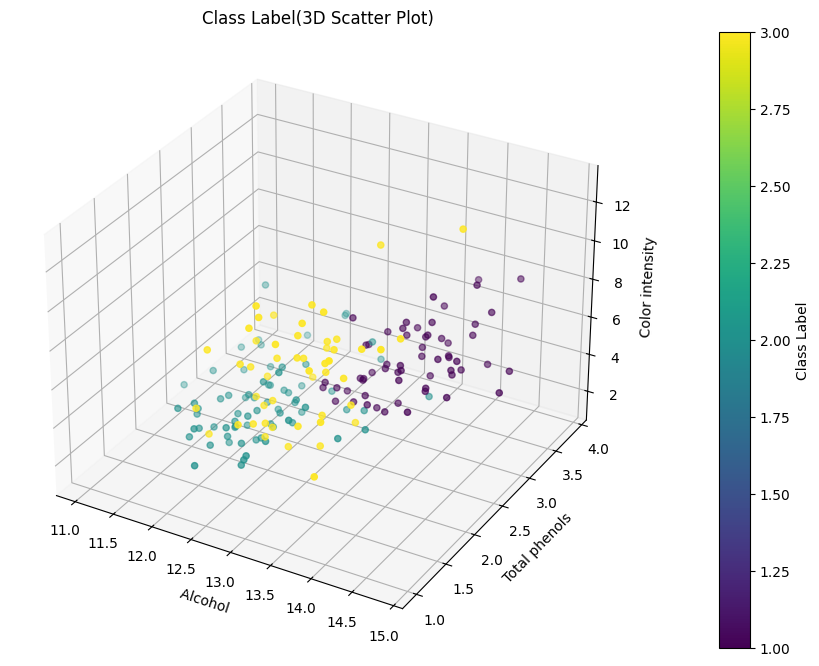

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize the 3D figure and axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(wine_data[" Alcohol"], 
                     wine_data[" Total phenols"], 
                     wine_data[" Color intensity"], 
                     c=wine_data["Class Label"], 
                     cmap='viridis')

# Add labels and title
ax.set_xlabel(" Alcohol")
ax.set_ylabel(" Total phenols")
ax.set_zlabel(" Color intensity")
ax.set_title("Class Label(3D Scatter Plot)")

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Class Label")

plt.show()

Explicit Color Mapping for Class Labels

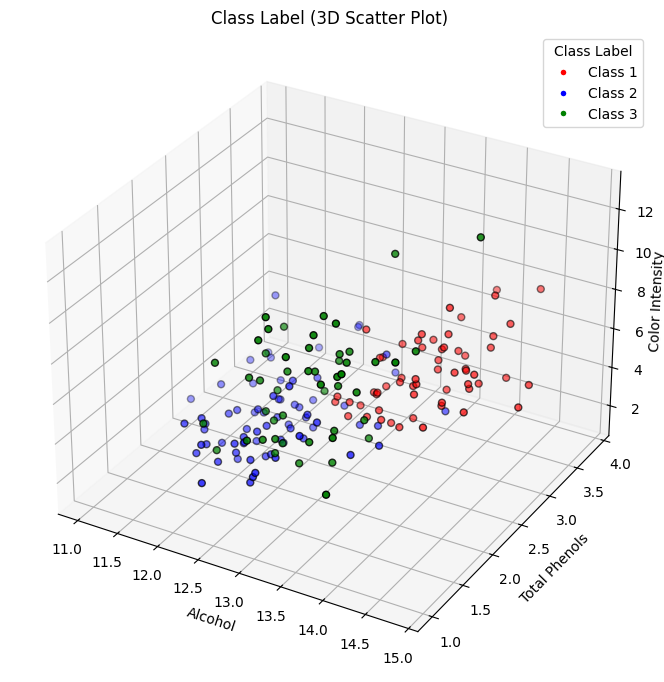

In [10]:
from matplotlib.lines import Line2D

# Define a color mapping for the 3 class labels
color_mapping = {1: 'red', 2: 'blue', 3: 'green'}
colors = wine_data["Class Label"].map(color_mapping)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(
    wine_data[" Alcohol"], 
    wine_data[" Total phenols"], 
    wine_data[" Color intensity"], 
    c=colors,
    s=25,
    edgecolor='k'
)

# Add labels with padding and rotation
ax.set_xlabel("Alcohol")
ax.set_ylabel("Total Phenols")
ax.set_zlabel("Color Intensity", labelpad=-2, rotation=0)  # Rotate label

# Add title and legend
ax.set_title("Class Label (3D Scatter Plot)")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Class 1', markerfacecolor='red', markersize=5),
    Line2D([0], [0], marker='o', color='w', label='Class 2', markerfacecolor='blue', markersize=5),
    Line2D([0], [0], marker='o', color='w', label='Class 3', markerfacecolor='green', markersize=5)
]
ax.legend(handles=legend_elements, loc='upper right', title="Class Label")

# Adjust subplot margins to avoid clipping
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

#### Prepare the data for training

Dataset is split into 3:<br>
1. Training set:<br> X_train.csv (126 samples with 3 features each), y_train.csv (output class labels)<br>
2. Validation set:<br> X_val.csv (27 samples), y_val.csv <br>
3. Test set: <br> X_test.csv (27 samples), y_test.csv <br>
Note: Validation set is used for optimizing the parameter alpha (learning rate) and is used in the notebook: OptimizeAlpha.ipynb

In [13]:
import numpy as np

In [14]:
# Read the CSV files for the training data
X_train = pd.read_csv('data/X_train.csv').values  # Convert the DataFrame to a NumPy array
y_train = pd.read_csv('data/y_train.csv').values  # Convert the DataFrame to a NumPy array

# Print the shape of the arrays to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (126, 3)
y_train shape: (126, 1)


In [15]:
X_train

array([[14.38     ,  3.25     ,  4.9      ],
       [12.67     ,  2.2      ,  2.62     ],
       [13.11     ,  2.2      ,  7.1      ],
       [12.08     ,  2.       ,  2.2      ],
       [12.87     ,  1.7      ,  7.65     ],
       [13.39     ,  2.85     ,  4.8      ],
       [13.17     ,  1.74     ,  7.9      ],
       [12.37     ,  3.52     ,  4.5      ],
       [12.52     ,  2.55     ,  2.       ],
       [13.03     ,  1.95     ,  4.6      ],
       [13.28     ,  2.6      ,  4.6      ],
       [13.78     ,  1.35     ,  9.58     ],
       [13.71     ,  2.61     ,  3.8      ],
       [12.51     ,  2.2      ,  2.94     ],
       [11.66     ,  1.61     ,  3.8      ],
       [13.88     ,  0.98     ,  4.9      ],
       [14.12     ,  2.2      ,  5.       ],
       [14.39     ,  2.5      ,  5.25     ],
       [13.3      ,  2.4      ,  3.95     ],
       [11.76     ,  1.75     ,  3.8      ],
       [13.24     ,  2.8      ,  4.32     ],
       [13.68     ,  2.42     ,  3.84     ],
       [12

##### Feature Scaling: Standardization

In [17]:
class StandardScaler():
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)

        # the standard deviation can be 0 in certain cases,
        #  which provokes 'devision-by-zero' errors; we can
        #  avoid this by adding a small amount if std==0
        self.std[self.std == 0] = 0.00001

    def transform(self, X):
        return (X - self.mean) / self.std

    def inverse_transform(self, X_scaled):
        return X_scaled * self.std + self.mean

In [18]:
scaler_train = StandardScaler()
scaler_train.fit(X_train)

X_train_scaled = scaler_train.transform(X_train)

In [19]:
n_samples_train = X_train.shape[0]
# Add a bias term (column of ones) to the scaled training dataset to account for the intercept term in logistic regression (theta_bias)
X_train_with_bias = np.c_[np.ones(n_samples_train), X_train_scaled]

In [20]:
X_train_with_bias

array([[ 1.00000000e+00,  1.74186584e+00,  1.49151066e+00,
        -5.73065297e-02],
       [ 1.00000000e+00, -4.02327300e-01, -1.12303348e-01,
        -1.05253202e+00],
       [ 1.00000000e+00,  1.49394910e-01, -1.12303348e-01,
         9.02998767e-01],
       [ 1.00000000e+00, -1.14213663e+00, -4.17791730e-01,
        -1.23586303e+00],
       [ 1.00000000e+00, -1.51544477e-01, -8.76024304e-01,
         1.14307509e+00],
       [ 1.00000000e+00,  5.00490862e-01,  8.80533894e-01,
        -1.00956770e-01],
       [ 1.00000000e+00,  2.24629757e-01, -8.14926627e-01,
         1.25220069e+00],
       [ 1.00000000e+00, -7.78501535e-01,  1.90391998e+00,
        -2.31907493e-01],
       [ 1.00000000e+00, -5.90414417e-01,  4.22301321e-01,
        -1.32316351e+00],
       [ 1.00000000e+00,  4.90817811e-02, -4.94163826e-01,
        -1.88257252e-01],
       [ 1.00000000e+00,  3.62560310e-01,  4.98673416e-01,
        -1.88257252e-01],
       [ 1.00000000e+00,  9.89517367e-01, -1.41062897e+00,
      

In [21]:
# Find the number of classes
n_classes = np.max(y_train)

# Create an empty one-hot encoded array
y_one_hot_train = np.zeros((y_train.size, n_classes))

# Populate the one-hot array
y_one_hot_train[np.arange(y_train.size), y_train.flatten() - 1] = 1  # Flatten y_train to 1D and subtract 1 for zero-indexing

# Print the one-hot encoded array
print("One-hot encoded y_train:")
print(y_one_hot_train)
print("Shape of one-hot encoded array:", y_one_hot_train.shape)

One-hot encoded y_train:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0

### Implementing Logistic Regression 

In [23]:
def linear_regression(data, thetas):
    """
    Perform linear regression to compute raw scores (logits).
    data: np.ndarray, shape (n_samples, n_features) - Input feature data.
    thetas: np.ndarray, shape (n_features, n_classes) - Model parameters.
    
    Returns:
    logits: np.ndarray, shape (n_samples, n_classes) - Raw logits for each class.
    """
    return data @ thetas

Using __softmax for multiclass classification__, because it ensures probabilities sum to 1 and emphasizes the most likely class.

In [25]:
def softmax(z):
    """
    Compute the softmax probabilities for multiclass classification.
    z: np.ndarray, shape (n_samples, n_classes) - Raw linear logits for each class.
    
    Returns:
    probabilities: np.ndarray, shape (n_samples, n_classes) - Normalized probabilities.
    """
    # Subtract max value in each row for numerical stability
    z_exp = np.exp(z - np.max(z, axis=1, keepdims=True))
    probabilities = z_exp / np.sum(z_exp, axis=1, keepdims=True)
    return probabilities

In [26]:
def logistic_regression(data, thetas):
    """
    Perform multiclass classification using softmax.
    data: np.ndarray, shape (n_samples, n_features) - Input feature data.
    thetas: np.ndarray, shape (n_features, n_classes) - Model parameters.
    
    Returns:
    probabilities: np.ndarray, shape (n_samples, n_classes) - Probabilities for each class.
    """
    z = linear_regression(data, thetas)  # Compute raw logits
    h = softmax(z)                       # Apply softmax to logits
    return h

Considering __weights (theta values) specific to each class__

In [28]:
from numpy.random import uniform

# Number of features (1 bias term + 3 features)
n_features = 4

# Initialize thetas: Random weights for each feature and class
#initial_thetas = np.array([uniform(-1, 1) for _ in range(n_features * n_classes)]).reshape(n_features, n_classes)

# Initialize thetas with random values between -1 and 1
initial_thetas = np.random.uniform(-1, 1, size=(n_features, n_classes))  # Shape: (n_features, n_classes)

# Print the shape to verify
print("Thetas shape:", initial_thetas.shape)
print("Thetas values:\n", initial_thetas)

Thetas shape: (4, 3)
Thetas values:
 [[ 0.25840264 -0.5217556   0.7258217 ]
 [-0.90676429 -0.09533802 -0.16288808]
 [-0.10253496 -0.26518626 -0.32199044]
 [-0.50304132 -0.19301338 -0.61552277]]


#### Cross-Entropy Loss

In [30]:
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss for multiclass classification.

    Parameters:
    y_true: np.ndarray, shape (n_samples, n_classes) - One-hot encoded ground truth labels.
    y_pred: np.ndarray, shape (n_samples, n_classes) - Predicted probabilities (from softmax).

    Returns:
    loss: float - Cross-entropy loss.
    """
    # Avoid log(0) issues by adding a small epsilon
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

#### Finding Cross-entropy derivatives (gradients) and performing Gradient descent optimization

In [32]:
def gradient_descent(data, y_true, original_thetas, alpha, iterations):
    """
    Perform gradient descent optimization for multiclass logistic regression.

    Parameters:
    data: np.ndarray, shape (n_samples, n_features) - Feature matrix with bias term.
    y_true: np.ndarray, shape (n_samples, n_classes) - One-hot encoded ground truth labels.
    original_thetas: np.ndarray, shape (n_features, n_classes) - Initial model parameters.
    alpha: float - Learning rate for gradient descent.
    iterations: int - Number of iterations to perform.

    Returns:
    optimized_thetas: np.ndarray, shape (n_features, n_classes) - Optimized model parameters.
    error_history: list - Cross-entropy error at each iteration.
    """
    optimized_thetas = original_thetas.copy()
    n_samples = data.shape[0]
    error_history = np.zeros(iterations)
    accuracy_history = np.zeros(iterations)

    for i in range(iterations):
        # Compute predictions using logistic regression (softmax applied)
        y_pred = logistic_regression(data, optimized_thetas)
        
        # Compute cross-entropy loss and record it
        #error = -np.sum(y_true * np.log(y_pred + 1e-12)) / n_samples  # Cross-entropy loss
        error_history[i] = cross_entropy_loss(y_true,y_pred)

        # Compute accuracy
        y_pred_labels = np.argmax(y_pred, axis=1)  # Predicted class labels
        y_true_labels = np.argmax(y_true, axis=1)  # True class labels
        accuracy_ = round((y_pred_labels == y_true_labels).mean() * 100, 2)
        accuracy_history[i] = accuracy_
        
        # Compute gradient of cross-entropy loss
        gradient = np.dot(data.T, (y_pred - y_true)) / n_samples  # Shape: (n_features, n_classes)

        # Update parameters using gradient descent
        optimized_thetas -= alpha * gradient

    return optimized_thetas, error_history, accuracy_history

#### Training model with Optimized thetas and optimized alpha

In [34]:
# Perform gradient descent
alpha = 0.1        # Learning rate
iterations = 350  # Number of iterations
trained_thetas, error_history, accuracy_history = gradient_descent(X_train_with_bias, y_one_hot_train, initial_thetas, alpha, iterations)

In [35]:
initial_thetas

array([[ 0.25840264, -0.5217556 ,  0.7258217 ],
       [-0.90676429, -0.09533802, -0.16288808],
       [-0.10253496, -0.26518626, -0.32199044],
       [-0.50304132, -0.19301338, -0.61552277]])

In [36]:
trained_thetas

array([[ 0.26153477,  0.23562458, -0.03469061],
       [ 0.89252415, -1.57980427, -0.47771027],
       [ 0.98990199,  0.00972874, -1.68934239],
       [-0.39455559, -2.19510573,  1.27808386]])

In [37]:
error_history

array([1.69065488, 1.60240014, 1.51888725, 1.44006616, 1.36586248,
       1.29617945, 1.23090038, 1.1698909 , 1.1130011 , 1.06006729,
       1.01091367, 0.96535403, 0.92319374, 0.88423201, 0.84826458,
       0.81508643, 0.78449466, 0.75629109, 0.73028464, 0.70629312,
       0.68414467, 0.66367865, 0.64474611, 0.62720984, 0.61094417,
       0.59583455, 0.5817769 , 0.56867695, 0.55644952, 0.54501771,
       0.53431218, 0.52427045, 0.51483622, 0.50595874, 0.49759225,
       0.48969547, 0.48223111, 0.47516544, 0.46846796, 0.46211101,
       0.45606951, 0.45032065, 0.44484368, 0.4396197 , 0.43463146,
       0.42986319, 0.42530048, 0.42093008, 0.41673987, 0.41271869,
       0.40885627, 0.40514315, 0.4015706 , 0.39813054, 0.3948155 ,
       0.39161856, 0.38853331, 0.38555377, 0.3826744 , 0.37989003,
       0.37719585, 0.37458736, 0.37206038, 0.36961096, 0.36723545,
       0.36493038, 0.36269254, 0.36051888, 0.35840656, 0.35635289,
       0.35435534, 0.35241154, 0.35051923, 0.3486763 , 0.34688

In [38]:
accuracy_history

array([24.6 , 26.19, 26.98, 26.98, 28.57, 29.37, 31.75, 32.54, 34.13,
       39.68, 43.65, 47.62, 50.79, 55.56, 64.29, 68.25, 75.4 , 76.98,
       79.37, 82.54, 84.13, 85.71, 85.71, 85.71, 87.3 , 87.3 , 88.1 ,
       88.89, 88.1 , 88.1 , 88.1 , 90.48, 90.48, 89.68, 89.68, 89.68,
       89.68, 89.68, 89.68, 89.68, 89.68, 89.68, 89.68, 88.89, 88.89,
       88.89, 88.89, 88.89, 88.89, 88.89, 88.1 , 88.1 , 88.1 , 88.1 ,
       88.1 , 88.1 , 88.1 , 88.1 , 88.1 , 88.1 , 88.1 , 88.1 , 88.1 ,
       88.1 , 88.1 , 88.1 , 87.3 , 87.3 , 87.3 , 87.3 , 87.3 , 87.3 ,
       87.3 , 87.3 , 87.3 , 87.3 , 87.3 , 87.3 , 88.1 , 88.1 , 88.1 ,
       88.1 , 88.1 , 88.1 , 88.1 , 88.1 , 88.89, 88.89, 88.89, 88.89,
       88.89, 89.68, 89.68, 89.68, 89.68, 89.68, 89.68, 89.68, 89.68,
       89.68, 89.68, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48,
       90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48,
       90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48, 90.48,
       90.48, 90.48,

#### Monitor the training by plotting loss and accuracy for the training data set

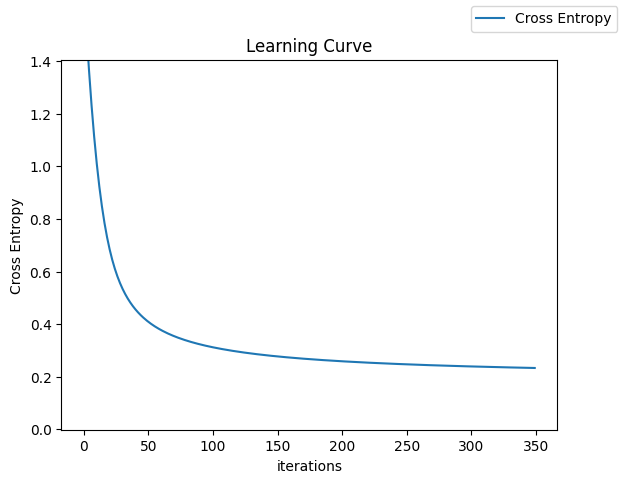

In [40]:
fig, ax = plt.subplots()

ax.plot(error_history, label="Cross Entropy")

# "zoom in" on 99% of the values:
upper_ylim = np.quantile(error_history, 0.99)
ax.set_ylim(-0.001, upper_ylim)

ax.set_xlabel("iterations")
ax.set_ylabel("Cross Entropy")
ax.set_title("Learning Curve")
fig.legend()
fig.savefig("learning_curve.jpg")

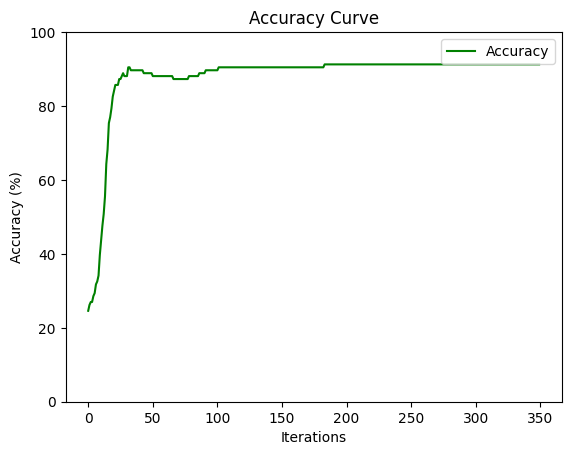

In [41]:
fig, ax = plt.subplots()

# Plot accuracy history
ax.plot(accuracy_history, label="Accuracy", color="green")

# Set the y-axis limits for accuracy (0 to 100 since accuracy is in percentage)
ax.set_ylim(0, 100)

ax.set_xlabel("Iterations")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Accuracy Curve")
ax.legend()
fig.savefig("accuracy_curve.jpg")

plt.show()

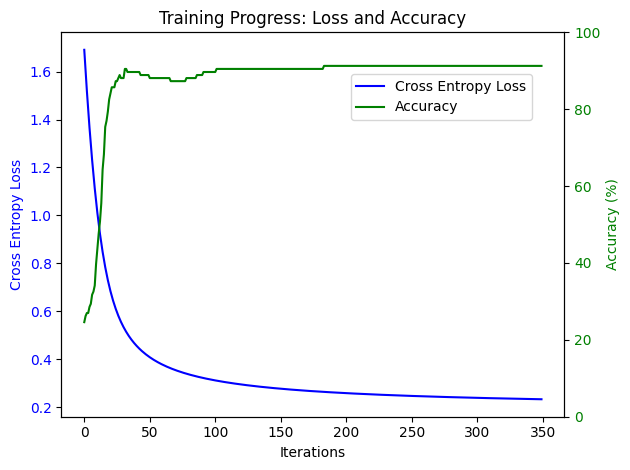

In [42]:
fig, ax1 = plt.subplots()

# Plot Cross-Entropy Loss on the left y-axis
ax1.plot(error_history, label="Cross Entropy Loss", color="blue")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Cross Entropy Loss", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Training Progress: Loss and Accuracy")

# Create a second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(accuracy_history, label="Accuracy", color="green")
ax2.set_ylabel("Accuracy (%)", color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_ylim(0, 100)  # Accuracy is in percentage (0 to 100)

# Add a legend for both curves
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# Save and show the plot
fig.tight_layout()
fig.savefig("training_monitoring.jpg")
plt.show()

In [43]:
predictions = logistic_regression(X_train_with_bias, trained_thetas)
predictions

array([[9.95502532e-01, 3.36059315e-03, 1.13687474e-03],
       [4.79164935e-02, 9.37717013e-01, 1.43664934e-02],
       [2.05956926e-01, 3.04652214e-02, 7.63577852e-01],
       [4.32686093e-03, 9.89708642e-01, 5.96449715e-03],
       [1.51120326e-02, 6.45425999e-03, 9.78433707e-01],
       [8.52557075e-01, 1.21955245e-01, 2.54876800e-02],
       [2.46708901e-02, 3.21708099e-03, 9.72112029e-01],
       [3.87966742e-01, 6.08569136e-01, 3.46412239e-03],
       [3.21631744e-02, 9.65942280e-01, 1.89454555e-03],
       [2.05199024e-01, 4.03451653e-01, 3.91349323e-01],
       [6.99738692e-01, 2.39513287e-01, 6.07480213e-02],
       [4.28461338e-03, 4.03700201e-05, 9.95675017e-01],
       [8.41091160e-01, 1.40239034e-01, 1.86698061e-02],
       [3.77512678e-02, 9.43427257e-01, 1.88214750e-02],
       [2.10612885e-03, 9.03103327e-01, 9.47905442e-02],
       [3.26091033e-02, 1.55188134e-02, 9.51872083e-01],
       [8.51237119e-01, 2.86457315e-02, 1.20117149e-01],
       [9.62611392e-01, 7.35445

In [44]:
# Convert predicted probabilities into class labels (1, 2, or 3)
y_train_predictions = 1 + np.argmax(predictions, axis=1)

In [45]:
y_train_predictions

array([1, 2, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 2, 2,
       1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 2, 2, 2, 1,
       1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 3, 2, 1, 1, 2, 3, 3, 1,
       2, 3, 3, 3, 3, 2, 1, 2, 1, 3, 1, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2], dtype=int64)

In [46]:
y_train.flatten()

array([1, 2, 3, 2, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 3, 1, 3, 2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 2, 2, 2,
       1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 2, 1, 1, 3, 3, 2, 3, 2, 2, 2, 1,
       1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1,
       2, 3, 3, 3, 3, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2], dtype=int64)

##### Accuracy on training dataset

In [48]:
accuracy = (y_train_predictions == y_train.flatten()).mean() # that's why this works
print(f"{accuracy*100:.2f}% of the samples have correctly been classified")

91.27% of the samples have correctly been classified


#### Model predictions for test data

In [50]:
# Read the CSV files for the testing data
X_test = pd.read_csv('data/X_test.csv').values  # Convert the DataFrame to a NumPy array
y_test = pd.read_csv('data/y_test.csv').values  # Convert the DataFrame to a NumPy array

# Print the shape of the arrays to verify
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (27, 3)
y_test shape: (27, 1)


__Feature Scaling__ on test data

In [52]:
scaler_test = StandardScaler()
scaler_test.fit(X_test)

X_test_scaled = scaler_test.transform(X_test)

In [53]:
n_samples = X_test.shape[0]
X_test_with_bias = np.c_[np.ones(n_samples),X_test_scaled]  # Add bias term as a column of ones

In [54]:
test_predictions = logistic_regression(X_test_with_bias, trained_thetas)
test_predictions

array([[1.05047836e-01, 3.52356919e-04, 8.94599807e-01],
       [8.20986833e-01, 1.35098799e-01, 4.39143677e-02],
       [1.69150976e-01, 7.82234933e-01, 4.86140912e-02],
       [9.90687327e-01, 7.57327057e-04, 8.55534607e-03],
       [9.17178503e-01, 5.30431782e-02, 2.97783191e-02],
       [8.30948733e-01, 8.32070727e-02, 8.58441941e-02],
       [1.77044692e-02, 2.80042624e-03, 9.79495105e-01],
       [8.04975519e-04, 9.60422910e-01, 3.87721145e-02],
       [9.76897104e-01, 2.07860338e-02, 2.31686203e-03],
       [2.57417401e-03, 9.96766811e-01, 6.59014690e-04],
       [2.42081026e-03, 1.95635407e-04, 9.97383554e-01],
       [4.66247690e-01, 4.51184398e-01, 8.25679119e-02],
       [8.90609868e-01, 3.74858299e-02, 7.19043018e-02],
       [9.08825226e-01, 6.58708484e-02, 2.53039257e-02],
       [9.43733354e-01, 4.32998540e-02, 1.29667918e-02],
       [5.16901688e-03, 9.79014447e-01, 1.58165361e-02],
       [7.00101567e-03, 9.90777983e-01, 2.22100144e-03],
       [2.82784035e-01, 3.11342

In [55]:
y_test_predictions = 1 + np.argmax(test_predictions, axis=1)

In [56]:
y_test_predictions

array([3, 1, 2, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 2, 3, 2, 2,
       2, 1, 3, 3, 2], dtype=int64)

In [57]:
# Create an empty one-hot encoded array
y_one_hot_test = np.zeros((y_test.size, n_classes))

# Populate the one-hot array
y_one_hot_test[np.arange(y_test.size), y_test.flatten() - 1] = 1  # Flatten y_train to 1D and subtract 1 for zero-indexing


##### Final loss and Accuracy on test dataset

In [59]:
final_loss = cross_entropy_loss(y_one_hot_test, test_predictions)

In [60]:
final_loss

0.19157969333766603

In [61]:
accuracy_test = (y_test_predictions == y_test.flatten()).mean() # that's why this works
print(f"{accuracy_test*100:.2f}% of the samples have correctly been classified")

96.30% of the samples have correctly been classified


##### Class-wise Accuracies on test dataset

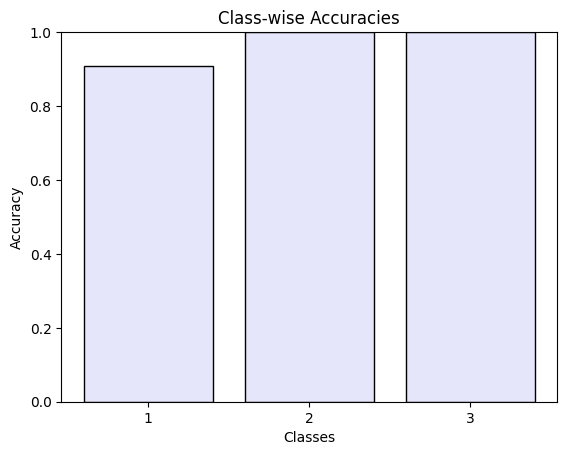

In [63]:
true_labels = y_test.flatten()  

# Step 1: Find unique classes
unique_classes = np.unique(true_labels)

# Step 2: Calculate class-wise accuracies
class_accuracies = []
for cls in unique_classes:
    total_samples = np.sum(true_labels == cls)
    correct_predictions = np.sum((true_labels == cls) & (y_test_predictions == cls))
    accuracy = correct_predictions / total_samples
    class_accuracies.append(accuracy)

# Step 3: Plot the results
plt.bar(unique_classes, class_accuracies, color='lavender', edgecolor='black')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracies')
plt.xticks(unique_classes)
plt.ylim(0, 1)
plt.show()

##### Confusion Matrix


Misclassified Samples:
Sample 2: True label =1, Predicted label =2, Features=[13.07  2.4   3.7 ]
Confusion Matrix:
[[10  1  0]
 [ 0  9  0]
 [ 0  0  7]]


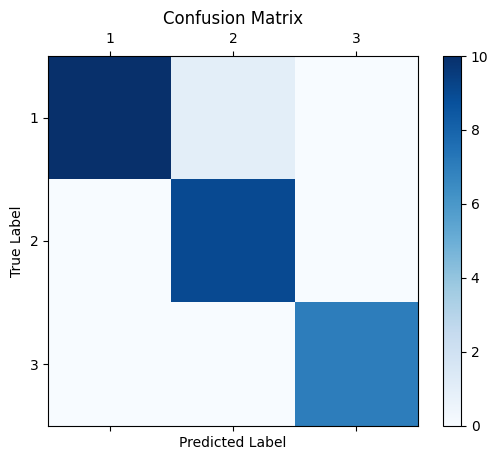

In [65]:
# Initialize confusion matrix
confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
classes = [1,2,3]

# Populate confusion matrix
for true, pred in zip(y_test.flatten(), y_test_predictions):
    confusion_matrix[true - 1, pred - 1] += 1  # Adjust index if labels start from 1

# Identify misclassified samples
misclassified_samples = np.where(y_test.flatten() != y_test_predictions)[0]
print("\nMisclassified Samples:")
for idx in misclassified_samples:
    print(f"Sample {idx}: True label ={y_test.flatten()[idx]}, Predicted label ={y_test_predictions[idx]}, Features={X_test[idx]}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

# Visualize confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Add labels
ax.set_xticks(range(n_classes))
ax.set_yticks(range(n_classes))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Hypotheses for Misclassifications

1. **Feature Overlap Between Classes:**  
   The features for Class 1 and Class 2 may have overlapping ranges or insufficient separation in feature space, causing the model to misclassify samples near the decision boundary.

2. **Linear Decision Boundary Limitation:**  
   Logistic regression creates linear decision boundaries. If the relationship between features and classes is non-linear, the model might fail to accurately distinguish between overlapping regions of Class 1 and Class 2.

3. **Insufficient Training Data in Overlapping Regions:**  
   If the dataset has fewer samples near the boundary separating Class 1 and Class 2, the model may not have learned enough to handle these edge cases.